<hr style="border:3px solid coral"></hr>

# Practice

<hr style="border:3px solid coral"></hr>

This practice will give you practice with collective communications.

<hr style="border:2px solid coral"></hr>

## Review : Scaling

<hr style="border:2px solid coral"></hr>

Below is a plot showing some times on multiple processes for a typical simulation code in computational science.  

Does this simulation show good scaling?  From the graph, estimate the times for each of four bars (ignore the different colors).  The times shown in the plot are from a *strong scaling* study, where the same simulation is run on $P=224$, $2P=448$, $4P=896$ and $8P=1792$ processors.  

<br>

<center>
<img width=450 src="Sphere_scaling.jpg"></img>
</center>    


### To Do

From the plot above, estimate the time the simulation needed for each run, ignoring the colors in each bar.  Then create three loglog plots - one that shows strong scaling, one that shows speed-up and one that shows efficiency.  In each case, plot the actual value (time, speed-up, efficiency) and ideal value. 

For each plot, the x-axis will be the number of processes. 

#### Recall

* **Strong scaling** : For simulations that scale well, doubling the number of processes should cut the simulation time in half. A plot should show simulation time vs. number of cores. 


* **Speed-up** : Factor by which doubling the number of processors reduces the total wall time.  In an ideal case, doubling the number of processes should lead to a 2x speed-up.  Plot the actual speed-up vs. number of cores.   Use the time on 224 processes as the baseline, e.g. 1x speed-up.


* **Efficiency** : Ratio of actual speed-up to ideal speed-up.  



In [1]:
from numpy import *
from matplotlib.pyplot import *

Create arrays $P$ for the number of processes and $T$ for times on each set of processes. 

In [2]:
P = array([224, 448, 896, 1792])

# TODO : Estimate timing results.
T = array([4100,2300,1200,1000])

<hr style="border:2px solid black"></hr>

### Strong scaling plot

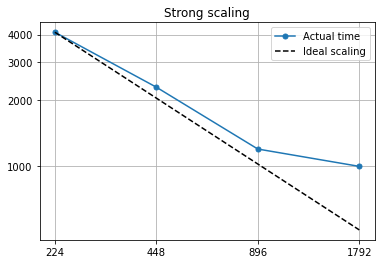

In [3]:
figure(1)
clf()

loglog(P,T,'.-',ms=10,label='Actual time')
loglog(P,T[0]/2**arange(4),'k--',ms=10,label='Ideal scaling')
# TO DO : Plot ideal strong scaling.

pstr =[f"{p:d}" for p in P]
xticks(P,pstr);

ytick = array([1000, 2000, 3000, 4000])
pstr =[f"{pt:d}" for pt in ytick]
yticks(ytick,pstr)

legend()
minorticks_off();

grid()

title('Strong scaling');

<hr style="border:2px solid black"></hr>

### Speed-up

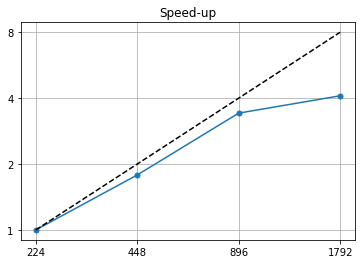

In [4]:
figure(2)
clf()
S_ideal = array([1,2,4,8])
# TODO : Plot actual and ideal speed-up
loglog(P,T[0]/T,'.-',ms=10,label='Actual spee-up')
loglog(P,S_ideal,'k--',ms=10,label='Ideal spee-up')

pstr =[f"{p:d}" for p in P]
xticks(P,pstr);

pstr =[f"{s:d}" for s in S_ideal]
yticks(S_ideal,pstr);

grid()
minorticks_off();


title('Speed-up');

<hr style="border:2px solid black"></hr>

### Efficiency

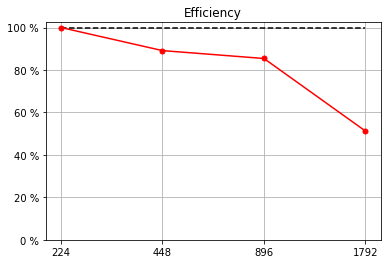

In [5]:
figure(3)
clf()

# TODO : Plot actual and ideal efficiency
E = 100*(T[0]/T)/S_ideal

E_ideal = array([100.0]*4)
semilogx(P,E_ideal ,'k--',ms = 10, label='Efficiency')
semilogx(P,E ,'r.-',ms = 10, label='Efficiency')

pstr =[f"{p:d}" for p in P]
xticks(P,pstr);

E = arange(0,120,20)
pstr =[f"{e:d} %" for e in E]
yticks(E,pstr);

grid()
minorticks_off();


title('Efficiency'); 

### Question : 

How well does this simulation scale? 

<hr style="border:2px solid coral"></hr>

## Review : Truncation error

<hr style="border:2px solid coral"></hr>

When developing numerical codes it is often useful as a verification step of code correctness to confirm the expected order of accuracy of a numerical scheme.  Below, you will confirm the second order accuracy of a finite difference scheme by numerically computing the *truncation error* of the scheme.

For this problem, you are going to compute the truncation error for the centered finite difference scheme approximation to the second derivative, given by 

\begin{equation}
u''(x_i) \approx \frac{u_{i-1} - 2 u_i + u_{i+1}}{h^2}, \qquad i = 0,1,\dots N
\end{equation}

where $u_i = u(x_i)$, $x_i = a + i h$, $h = (b-a)/N$ on an interval $[a,b]$. 

#### Truncation error
The *truncation error* $\tau(x;h)$ at a grid point $x_i$ associated with the centered difference approximation is given by

\begin{equation}
\tau(x_i;h)  = \left|\frac{u_{i-1} - 2 u_i + u_{i+1}}{h^2} - u''(x_i) \right| = \frac{1}{12}u''''(x_i) \; h^2 + \mathcal O(h^4).  
\end{equation}

The underlying idea is that as $h$ (*mesh width*) goes to zero, this trunction error goes to 0 and our finite difference approximation at $x_i$ approaches the exact second derivative $u''(x_i)$.  *This particular form of the truncation error can be easily found using Taylor series expansions learned in Calculus I.*

The centered difference scheme is referred to as a *second order scheme*, since $\tau(x;h) \sim \mathcal O(h^2)$ in the limit as $h$ goes to zero.

#### Numerical verification of the order of accuracy

In practice, we can confirm the order accuracy of a numerical method by  neglecting the higher order terms in the truncation error and defining a numerical trunction error as 

\begin{equation}
\tau_i \equiv \tau(x_i; h) \approx  C h^p
\end{equation}

For the second order, centered difference scheme above, the constant $C$ is depends on the fourth derivative of $u(x)$, or 

\begin{equation}
C \approx \frac{1}{12}u''''(x_i). 
\end{equation}

If we halve the mesh width $h$ for the centered scheme, we expect that the trunction error is reduced by a quarter, since

\begin{equation}
\tau(x_i;h/2) \approx C\left(\frac{h}{2}\right)^2 = \frac{C}{4}h^2 = \frac{1}{4}\tau(x_i; h).
\end{equation}

To confirm the second order accuracy of the  truncation error, we compute a sequence of values $N_m$ and $T_m$, $m = 0,1,\dots,M$ as follows. 

* Define $N_m = N_0 2^m$. 

* Define $h_m = (b-a)/N_m$ and $x_i = a + ih_m$ for $i = 0,1,\dots N_m$.

Then

1. Compute $\tau_i =\tau(x_i; h_m)$ at each grid point $x_i$.  Call this vector $\mathbf t$, with components $\tau_i$. 


2. Compute the inf-norm $\Vert \cdot \Vert_{\infty}$ of the vector $\mathbf t$ as 

\begin{equation}
\left\Vert \mathbf t \right\Vert_{\infty}^{N_m} = \max_{i=0,1,\dots N_m} |\tau_i|
\end{equation}

3.  Define $T_m = \Vert \mathbf t \Vert_{\infty}^{N_m}$.  

Using vectors $\mathbf H$ and $\mathbf T$ with components $h_m$ and $T_m$, we seek a parameter $p$ that fits the model

\begin{equation}
T_m = C h_m^p.
\end{equation}

Taking the log of both sides, we get the linear expression 

\begin{equation}
\log(T_m) = \log(h_m)\; p + \log(C)
\end{equation}

Using linear regression (e.g. `polyfit`), we can find a value $p$ (e.g. *slope*) that best fits our linear model.    For the centered difference scheme, this slope should be approximately 2.  

An alternative formulation that will give us the same slope (with opposite sign) is 

\begin{equation}
\log(T_m) = \log(N_m)\; p + \log(C)
\end{equation}

This is more convenient form, since we can label the x-axis with integer $N$ values rather than small $h$ values. 

### To Do

Write a Python code that computes the truncation error for the centered finite difference scheme. 

Use the true function $u(x) = \cos(x)$.  

In [17]:
a = 0
b = 2*pi

err = []
Nv = []
M = 5
N0 = 32
e0 = 1e-2
for p in range(M+1):
    N = N0*(2**p); 
    
    x = linspace(a,b,N+1) 
    
    h = (b - a)/N
    # TODO : Evaluate u
    u = cos(x)
    
    # TODO : Compute finite difference scheme Laplacian
    L = (u[2:] - 2*u[1:-1] + u[:-2])/h**2
    
    # TODO : Compute truncation error
    upp = -cos(x[1:-1])
    tau = abs(L - upp)
    # TODO : Compute norm g of truncation error
    g = max(tau)
    #g = e0/2**p  # Obviously not correct
    print(f"{N:8d} {g:16.4e}")
    
    err.append(g)
    Nv.append(N)
    
err = array(err)
Nv = array(Nv)

      32       3.2086e-03
      64       8.0293e-04
     128       2.0078e-04
     256       5.0198e-05
     512       1.2550e-05
    1024       3.1375e-06


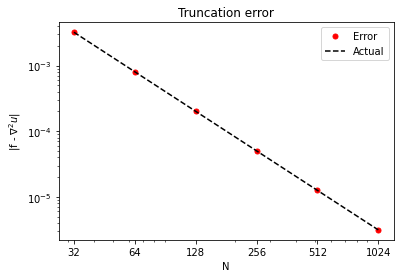

In [7]:
figure(2)
clf()

# TODO : Get best fit line to (N,err)

# Plot best fit line (loglog)
ps = polyfit(log(Nv),log(err),1)
#label = f"slope = {ps[0]}
# Plot actual data points (loglog)
loglog(Nv,err,'r.',ms=10,label='Error')
loglog(Nv,exp(polyval(ps,log(Nv))),'k--',ms=10,label='Actual')


# Make nice tick marks
pstr = ([f'{N:d}' for N in Nv])
xticks(Nv,pstr)

legend();

title("Truncation error")
xlabel("N")
ylabel(r"|f - $\nabla^2 u|$");

<hr style="border:2px solid coral"></hr>

## Compute truncation error (in parallel)

<hr style="border:2px solid coral"></hr>

Think about what we would need need to compute the truncation error in parallel. 


In [8]:
L

array([-0.99997804, -0.99992156, -0.99982744, ..., -0.99982744,
       -0.99992156, -0.99997804])

In [9]:
upp

array([-0.99998118, -0.9999247 , -0.99983058, ..., -0.99983058,
       -0.9999247 , -0.99998118])

In [10]:
len(upp)

1023

In [13]:
a = 0
b = 2*pi

err = []

N0 = 300
e0 = 1e-2

x = linspace(a,b,23+1) 
    
h = (b - a)/N
    # TODO : Evaluate u
u = cos(x)
    
    # TODO : Compute finite difference scheme Laplacian
L = (u[2:] - 2*u[1:-1] + u[:-2])/h**2
    
    # TODO : Compute truncation error
upp = -cos(x[1:-1])
tau = abs(L - upp)
    # TODO : Compute norm g of truncation error
g = max(tau)
    #g = e0/2**p  # Obviously not correct

    


In [14]:
L

array([-1896.83979243, -1683.11104938, -1344.55365951,  -906.27687564,
        -400.78568184,   134.4299525 ,   659.67553225,  1135.99599558,
        1528.06483276,  1806.80409172,  1951.54095678,  1951.54095678,
        1806.80409172,  1528.06483276,  1135.99599558,   659.67553225,
         134.4299525 ,  -400.78568184,  -906.27687564, -1344.55365951,
       -1683.11104938, -1896.83979243])

In [15]:
x

array([0.        , 0.27318197, 0.54636394, 0.81954591, 1.09272788,
       1.36590985, 1.63909182, 1.91227379, 2.18545576, 2.45863773,
       2.7318197 , 3.00500167, 3.27818364, 3.55136561, 3.82454758,
       4.09772955, 4.37091152, 4.64409349, 4.91727546, 5.19045743,
       5.4636394 , 5.73682137, 6.01000334, 6.28318531])

In [19]:
x = linspace(0,2*pi)

In [23]:
cos(x)

array([ 1.        ,  0.99179001,  0.96729486,  0.92691676,  0.8713187 ,
        0.80141362,  0.71834935,  0.6234898 ,  0.51839257,  0.40478334,
        0.28452759,  0.1595999 ,  0.03205158, -0.09602303, -0.22252093,
       -0.34536505, -0.46253829, -0.57211666, -0.67230089, -0.76144596,
       -0.8380881 , -0.90096887, -0.94905575, -0.98155916, -0.99794539,
       -0.99794539, -0.98155916, -0.94905575, -0.90096887, -0.8380881 ,
       -0.76144596, -0.67230089, -0.57211666, -0.46253829, -0.34536505,
       -0.22252093, -0.09602303,  0.03205158,  0.1595999 ,  0.28452759,
        0.40478334,  0.51839257,  0.6234898 ,  0.71834935,  0.80141362,
        0.8713187 ,  0.92691676,  0.96729486,  0.99179001,  1.        ])